# Credit Scoring Model

This notebook is used for exploratory data analysis, model training, and evaluation for the credit scoring model. It includes code and visualizations to help understand the data and the performance of the model.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

print("Libraries imported successfully!")

Libraries imported successfully!


In [7]:
file = '../loan_data.csv'  

try:
    df = pd.read_csv(file)
    print(f"Dataset loaded successfully from '{file}'")
    print(f"Dataset shape: {df.shape}")
except FileNotFoundError:
    print(f"Error: The file '{file}' was not found.")
    df = None
except Exception as e:
    print(f"An error occurred while loading the file: {e}")
    df = None

if df is not None:
    print("\nFirst 5 rows:")
    display(df.head())

Dataset loaded successfully from '../loan_data.csv'
Dataset shape: (45000, 14)

First 5 rows:


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_d

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


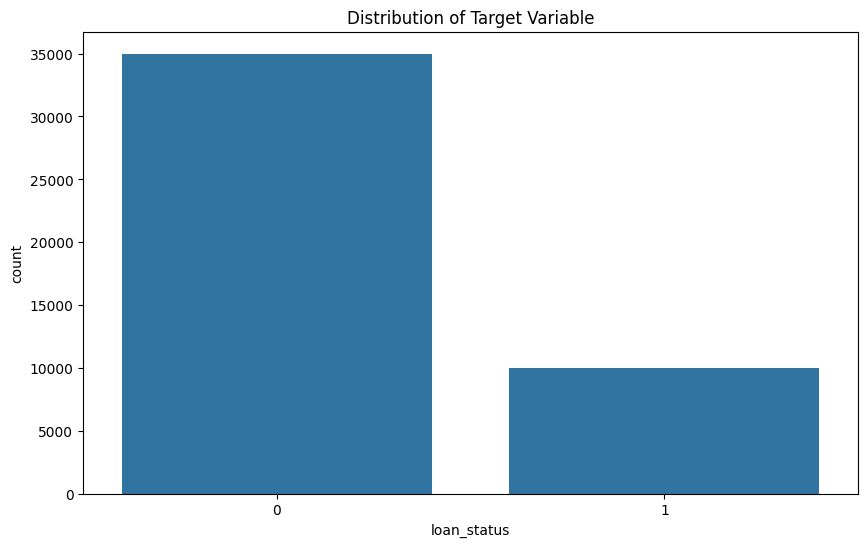

In [9]:
# Exploratory Data Analysis
if df is not None:
    print("\nDataFrame Info:")
    df.info()
    
    print("\nDescriptive Statistics:")
    display(df.describe())
    
    # Visualizations
    plt.figure(figsize=(10, 6))
    sns.countplot(x='loan_status', data=df)  
    plt.title('Distribution of Target Variable')
    plt.show()


Model Evaluation:
Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      6990
           1       0.90      0.77      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000



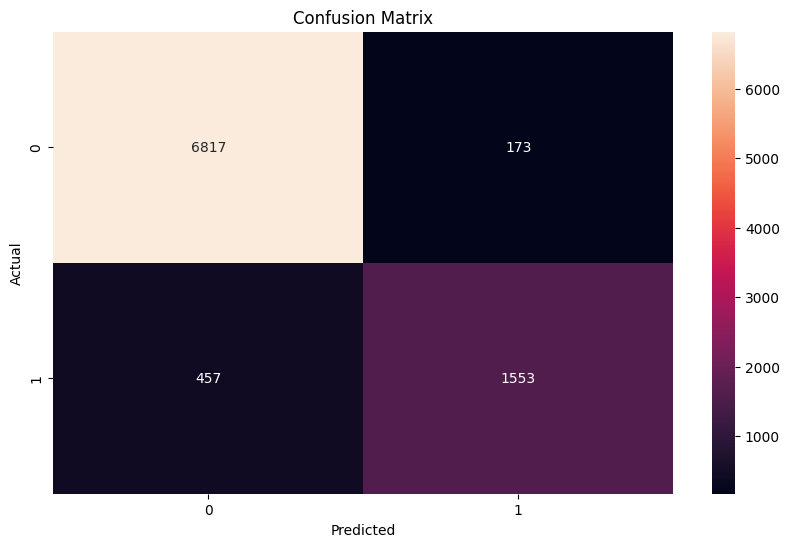

In [13]:
# Model Training
if df is not None:
    # One-hot encode categorical variables
    df_encoded = pd.get_dummies(df, drop_first=True)
    
    # Preprocessing and feature selection
    X = df_encoded.drop('loan_status', axis=1)
    y = df_encoded['loan_status']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Standardizing the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Training the model
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Evaluation
    print("\nModel Evaluation:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    plt.figure(figsize=(10, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [15]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean CV score:", scores.mean())

Cross-validation scores: [0.92311111 0.91855556 0.91866667 0.92766667 0.93455556]
Mean CV score: 0.9245111111111111


In [16]:
import joblib
joblib.dump(model, 'credit_scoring_model.pkl')

['credit_scoring_model.pkl']

In [17]:
import joblib
import pickle

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Save the feature columns
with open('feature_columns.pkl', 'wb') as f:
    pickle.dump(X.columns.tolist(), f)